In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn

In [2]:
folder_path = '../../../data/cleaned-data'
ob_folders = os.listdir(folder_path)
for ob_folder in ob_folders:
    folders = os.listdir(folder_path + f'/{ob_folder}')
    if folders:
        for year_folder in folders:
            month_folders = os.listdir(folder_path + f'/{ob_folder}/{year_folder}')
            if month_folders:
                for month_folder in month_folders:
                    data_folders = os.listdir(folder_path + f'/{ob_folder}/{year_folder}/{month_folder}')
                    if data_folders:
                        for data_folder in data_folders:
                            data_file = folder_path + f'/{ob_folder}/{year_folder}/{month_folder}/{data_folder}/data.csv'
                            if os.path.exists(data_file):
                                df = pd.read_csv(data_file)
                                if len(df) != 1440:
                                    print(len(df), data_file)
                                else:
                                    continue

In [153]:
cols = ['RAF', 'RA1', 'RI1', 'ERA', 'CRA', 'AT1', 'RH1', 'PRS', 'SLP', 'WD1', 'WDM', 'WS1', 
        'WSM', 'WND', 'WNS', 'SOL', 'WET', 'WBG', 'WEA']
file_path = '../../../data/cleaned-data/Vlz-Bagbaguin_00174731/2020/07/2020-07-21/data.csv'
df = pd.read_csv(file_path, index_col='Datetime')
print(len(df.columns))
df.head()
df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()
(total_missing / total_cells) * 100

19


41.25

In [157]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn import linear_model

imp = SimpleImputer(strategy='mean')


# rain_cols = ['RAF', 'RA1', 'RI1', 'ERA', 'CRA']
# not_rain_cols = [x for x in cols if not x in rain_cols]
test_df = df.copy()
#test_df["X"] = list(range(1, 1441))
test_df = test_df.fillna(method='bfill', axis=0, limit=3)
test_df = test_df.fillna(method='ffill', axis=0, limit=3)
total_missing = test_df.isnull().sum().sum()
print('bfill imputation ', (total_missing / total_cells) * 100)

# for_reg_df = test_df.dropna()
# X = for_reg_df.X.values.reshape(len(for_reg_df), 1)
# y = for_reg_df.CRA
# transformer = imp.fit(X, y)

test_df[rain_cols] = test_df[rain_cols].fillna(0)
test_df = pd.DataFrame(imp.fit_transform(test_df))
test_df.columns = df.columns
test_df.index = df.index
#test_df[not_rain_cols] = test_df[not_rain_cols].fillna(method='bfill', axis=0)
total_missing = test_df.isnull().sum().sum()
print('ffill imputation after imputation ', (total_missing / total_cells) * 100)
test_df.to_csv('test.csv')

for_reg_df.to_csv('test-test.csv')

bfill imputation  40.13888888888889
ffill imputation after imputation  0.0


['RAF', 'RA1', 'RI1', 'ERA', 'CRA']


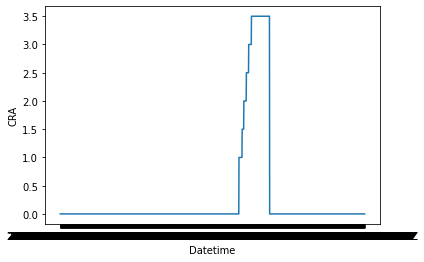

In [156]:
test_df.head()
print(rain_cols)
sns.lineplot(y=test_df['CRA'], x=test_df.index)

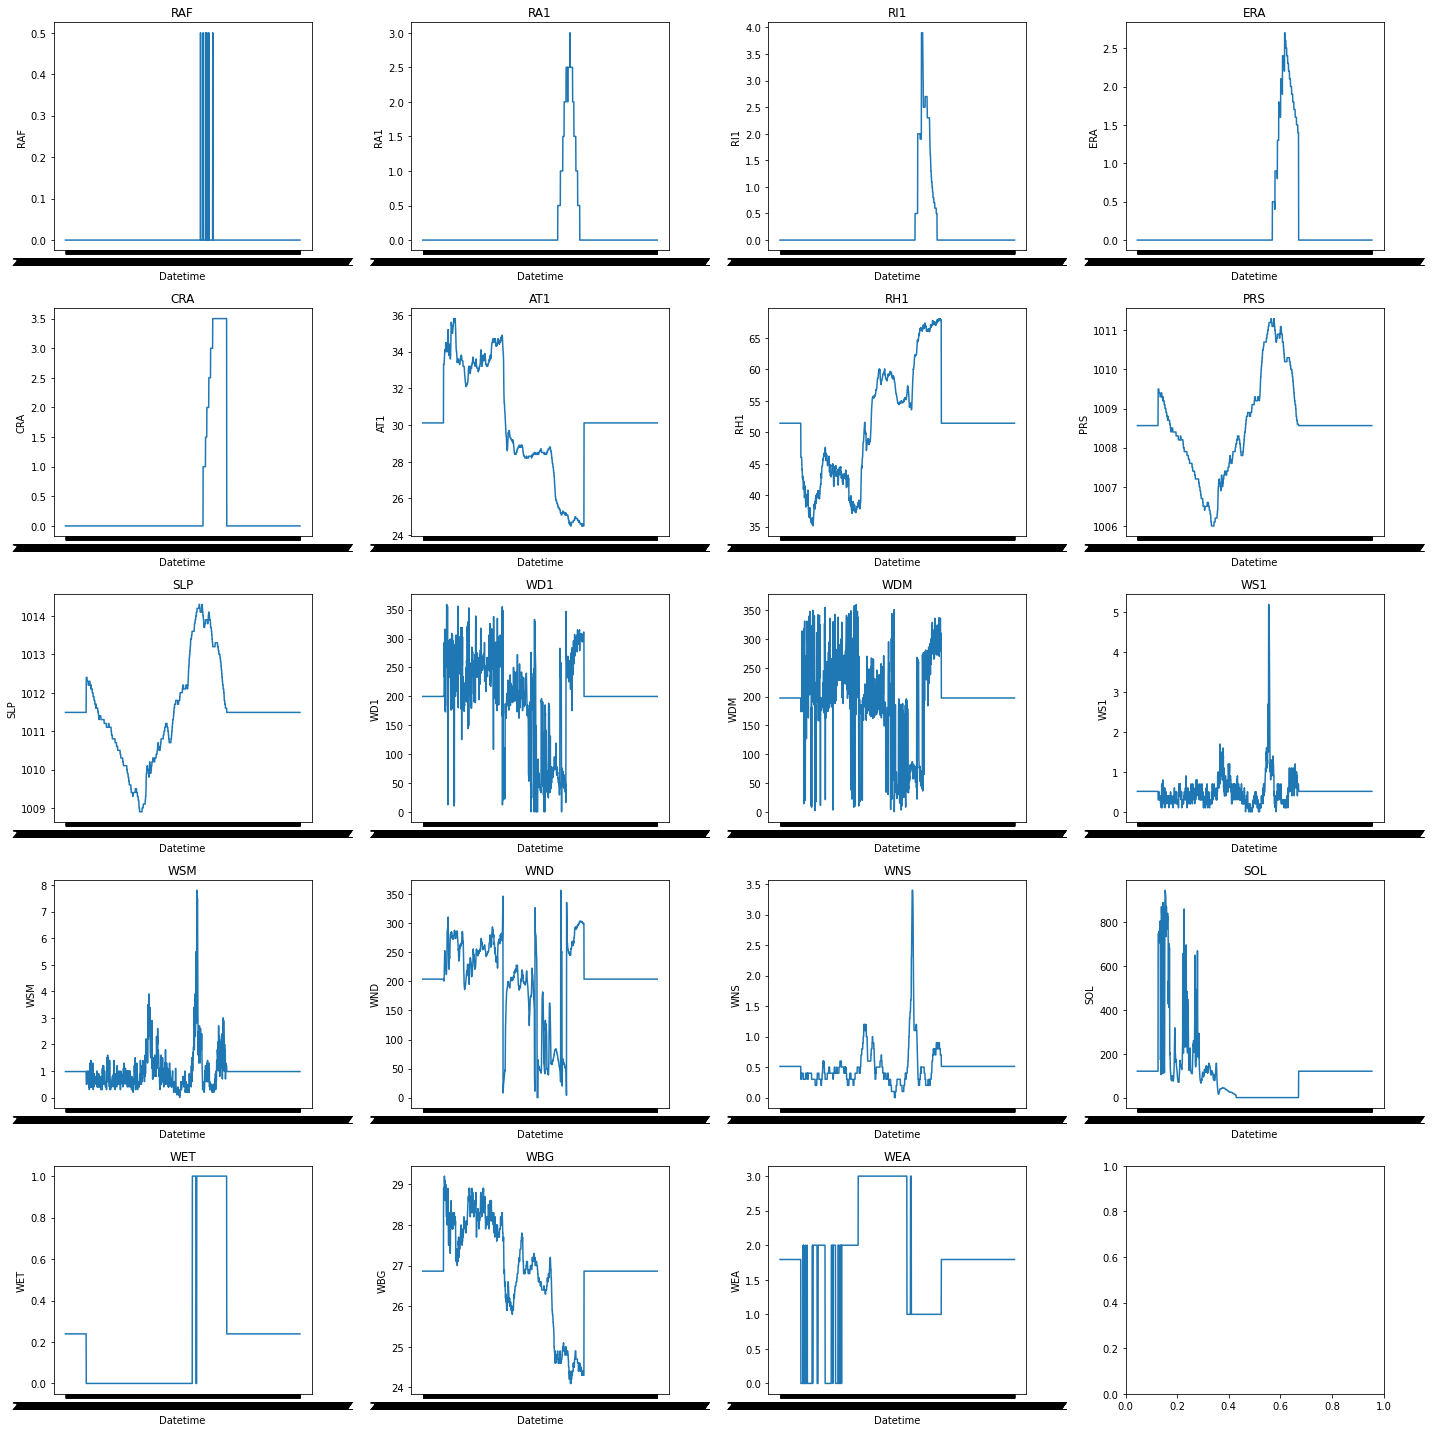

In [152]:
fig, axis = plt.subplots(5, 4, figsize=(20, 20))
count = 0
for i in range(5):
    for j in range(4):
        if count < 19:
            sns.lineplot(data=test_df, x='Datetime', y=str(df.columns[count]), ax=axis[i, j])
            axis[i, j].set_title(str(df.columns[count]))
        count += 1
fig.tight_layout()

In [53]:
count = 0
for i in range(5):
    for j in range(4):
        if count < 19:
            print(count)
            print(test_df.columns[count])
        count += 1
print(count)

0
RAF
1
RA1
2
RI1
3
ERA
4
CRA
5
AT1
6
RH1
7
PRS
8
SLP
9
WD1
10
WDM
11
WS1
12
WSM
13
WND
14
WNS
15
SOL
16
WET
17
WBG
18
WEA
20
